# Exploratory Data Analysis

In [1]:
## import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = sns.load_dataset("tips")

In [3]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
## shape of the data
print("Shape of the data:", data.shape)

Shape of the data: (244, 7)


In [8]:
## columns of the data
print("Columns in the data:", data.columns)

Columns in the data: Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [9]:
## info of the data
print("Info of the data:")
data.info()

Info of the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [10]:
## check for missing values
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [11]:
## duplicates
data.duplicated().sum()

1

In [12]:
## dropping duplicates
data = data.drop_duplicates()

In [13]:
data.duplicated().sum()

0

In [14]:
## statistics of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,243.0,19.813868,8.910071,3.07,13.38,17.81,24.175,50.81
tip,243.0,3.002387,1.385002,1.00,2.00,2.92,3.575,10.00
size,243.0,2.572016,0.952356,1.00,2.00,2.00,3.000,6.00


In [17]:
## correlation of the data
data.corr(numeric_only=True)

,total_bill,tip,size
total_bill,1.000000,0.674998,0.597589
tip,0.674998,1.000000,0.488400
size,0.597589,0.488400,1.000000


### Insights:

* **total_bill and tip** : There is a strong positive correlation between the total_bill and the tip amount.

* Meaning: As the total bill amount increases, the tip amount tends to increase as well. This is an expected and intuitive relationship, as people generally tip a higher amount on larger bills.

* **total_bill and size** : There is a moderately strong positive correlation between the total_bill and the size of the party.

* Meaning: Larger groups tend to have higher total bills. This makes sense as more people dining together would generally lead to a higher overall cost of the meal.

* **tip and size** : There is a moderate positive correlation between the tip amount and the size of the party.

* Meaning: As the party size increases, the tip amount also tends to increase. This is logical, as larger bills (correlated with size) would naturally lead to larger tips.

## Univariate Analysis

### Chart - 1

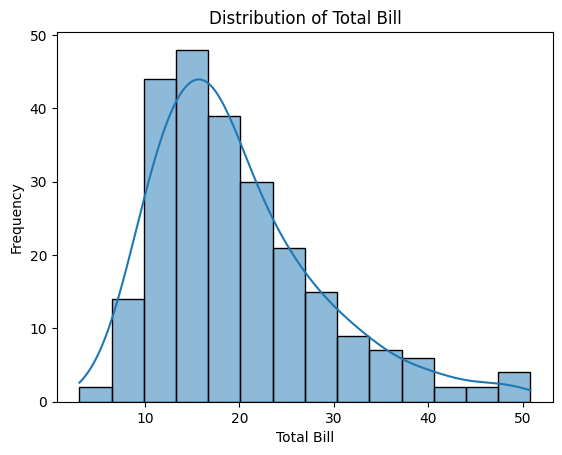

In [18]:
sns.histplot(data['total_bill'], kde=True)
plt.title('Distribution of Total Bill')
plt.xlabel('Total Bill')    
plt.ylabel('Frequency')
plt.show()

### Insights:

* Right-Skewed: The distribution is positively skewed, with a longer tail towards higher bill amounts.

* Peak Frequency: Most total bills fall between approximately $10 and $20.

* Less Common Large Bills: Bills over $30 are significantly less frequent.

### Chart - 2

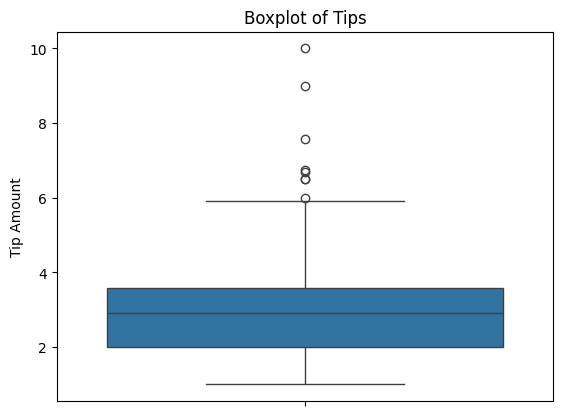

In [21]:
sns.boxplot(y=data['tip'])
plt.title('Boxplot of Tips')
plt.ylabel('Tip Amount')    
plt.show()  

### Insights:
* Median Tip: Approximately \$3.00.

* Typical Range: Most tips (middle 50%) are between \$2.00 and \$3.50.

* High Outliers: Several tips significantly exceed the typical range, going up to \$10.00.

* Right-Skewed: The data is skewed towards higher tip amounts.

### Chart - 3

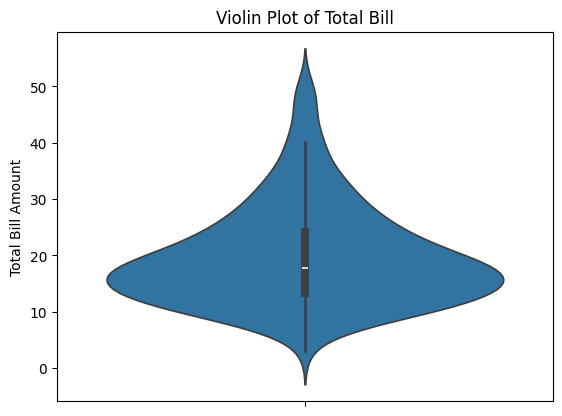

In [22]:
sns.violinplot(y=data['total_bill'])
plt.title('Violin Plot of Total Bill')
plt.ylabel('Total Bill Amount')
plt.show()

### Insights:

* Skewed Right: Most bills are smaller, with a few larger ones.

* Peak: Highest density of bills is around $10-$25.

* Range: Bills span from near $0 up to about $55.

### Chart - 4

C:\Users\SRINIJA\AppData\Local\Temp\ipykernel_22076\3004887566.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day', data=data, palette='Set2')


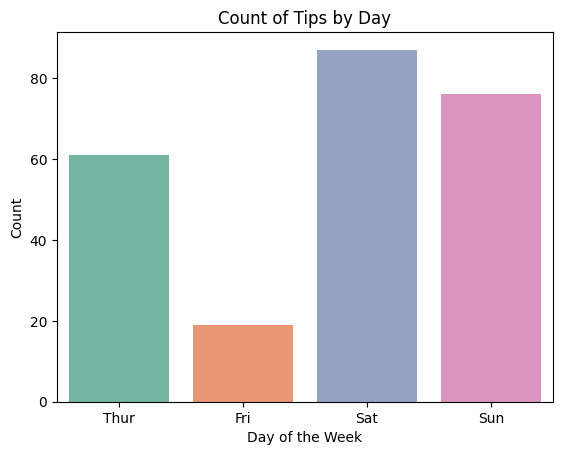

In [23]:
sns.countplot(x='day', data=data, palette='Set2')
plt.title('Count of Tips by Day')   
plt.xlabel('Day of the Week')
plt.ylabel('Count') 
plt.show()

### Insights:

* Weekends are Busiest: Saturday has the highest number of tips, followed closely by Sunday.

* Thursdays are Moderate: Thursdays see a moderate number of tips.

* Friday is Slowest: Friday has significantly fewer tips compared to other days.

### Chart - 5

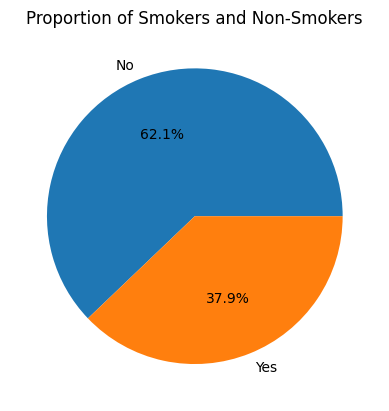

In [27]:
plt.pie(data['smoker'].value_counts(),
        labels=data['smoker'].value_counts().index,
        autopct='%1.1f%%')
plt.title('Proportion of Smokers and Non-Smokers')
plt.show()

### Insights:

* Majority Non-Smokers: The restaurant serves a higher proportion of non-smokers (62.1%).

* Significant Smoker Presence: Smokers still make up a substantial portion of the clientele (37.9%).

## Bivariate Analysis

### Chart - 6

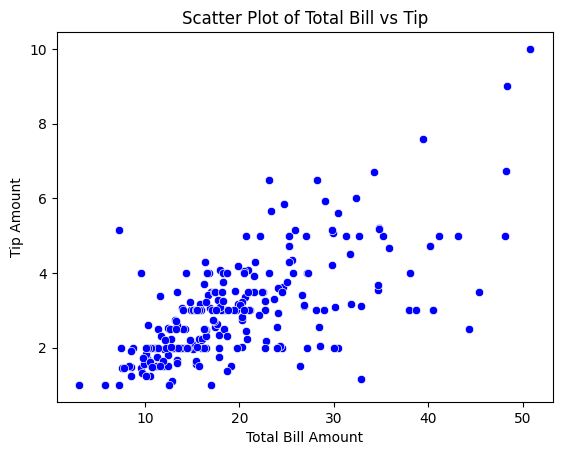

In [29]:
sns.scatterplot(x='total_bill', y='tip', data=data, color='blue')
plt.title('Scatter Plot of Total Bill vs Tip')
plt.xlabel('Total Bill Amount') 
plt.ylabel('Tip Amount')
plt.show()


### Insights:

* Positive Relationship: As the total bill amount increases, the tip amount generally increases as well.

* Moderate to Strong Correlation: The points show a clear upward trend, indicating a significant positive correlation.

* Spread: While there's a trend, there's also some variability in tip amounts for a given bill size.

### Chart - 7

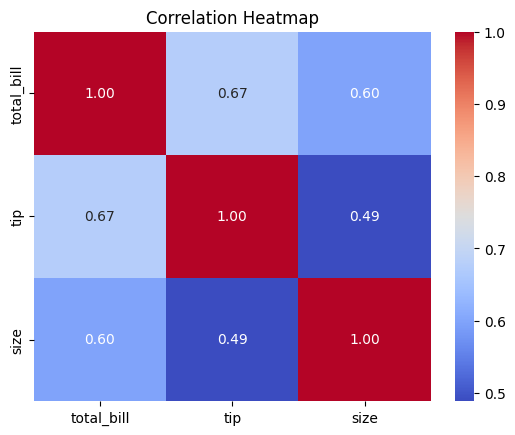

In [31]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Insights:

* Total Bill & Tip: Strong positive correlation (0.67).

* Total Bill & Size: Moderately strong positive correlation (0.60).

* Tip & Size: Moderate positive correlation (0.49).

### Chart - 8

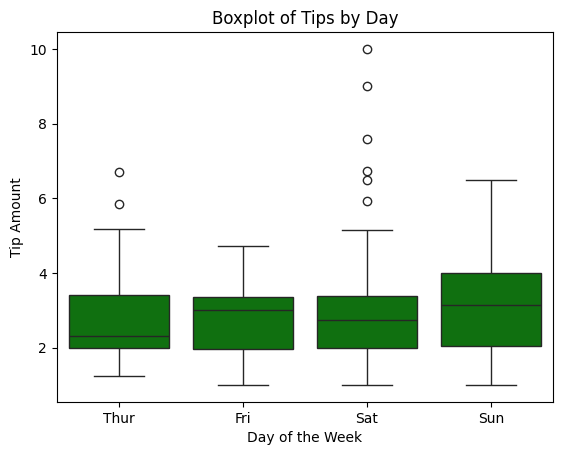

In [34]:
sns.boxplot(x='day',y='tip',data=data,color='green')
plt.title('Boxplot of Tips by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Tip Amount')
plt.show()

### Insights:

* Sunday has Highest Median Tip: The median tip amount is highest on Sunday.

* Similar Medians: Thursday, Friday, and Saturday have very similar median tip amounts.

* Saturday has Most Outliers: Saturday shows the most and highest tip outliers.

* Wider Range on Sunday: Sunday tips have a broader upper range, indicating higher typical tips without being outliers, compared to other days.

### Chart - 9

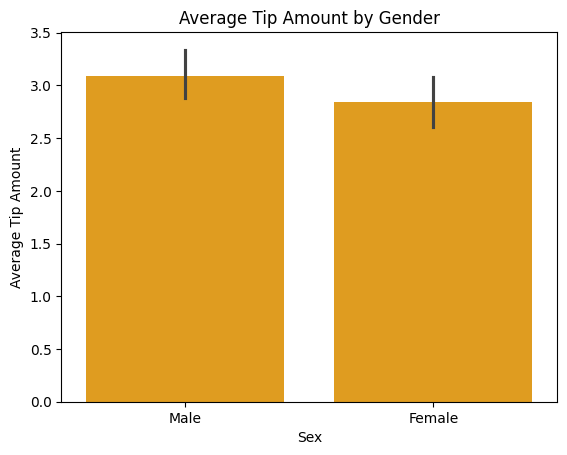

In [38]:
sns.barplot(x='sex',y='tip',estimator=np.mean, data=data, color='orange')
plt.title('Average Tip Amount by Gender')
plt.xlabel('Sex')
plt.ylabel('Average Tip Amount')
plt.show()

### Insights:

* Slight Male Lead: Males leave a slightly higher average tip amount than females.

* No Significant Difference: The overlapping error bars suggest that this difference is likely not statistically significant.

### Chart - 10

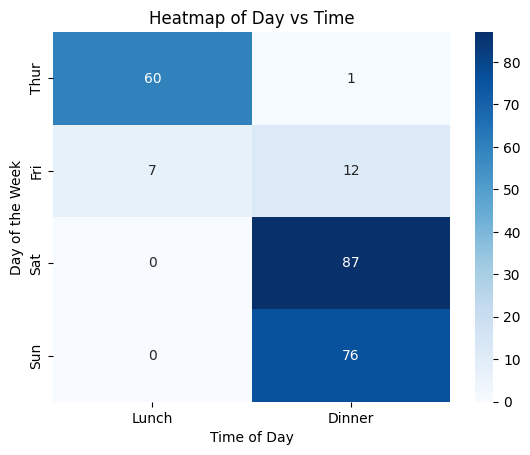

In [41]:
sns.heatmap(pd.crosstab(data['day'], data['time']), annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Day vs Time')
plt.xlabel('Time of Day')    
plt.ylabel('Day of the Week')
plt.show()


### Insights:

* Weekend Focus on Dinner: Saturday and Sunday overwhelmingly serve dinner, with virtually no lunch service.

* Thursday Lunch Dominates: Thursdays are primarily a lunch-only day.

* Friday Mix: Fridays have both lunch and dinner service, but dinner is slightly more frequent.

* Busiest Sessions: Saturday dinner is the busiest period, followed by Sunday dinner.

## Multivariate Analysis

### Chart - 11

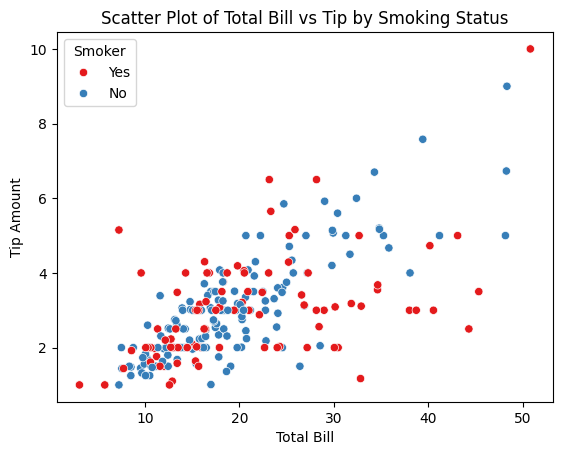

In [42]:
sns.scatterplot(x='total_bill', y='tip', hue='smoker', data=data, palette='Set1')
plt.title('Scatter Plot of Total Bill vs Tip by Smoking Status')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.legend(title='Smoker')
plt.show()

### Insights:

* Positive Trend: Both groups tip more with larger bills.

* Non-Smokers vs. Smokers: Non-smokers account for more of the higher total bills and corresponding tips.

<Figure size 1000x600 with 0 Axes>

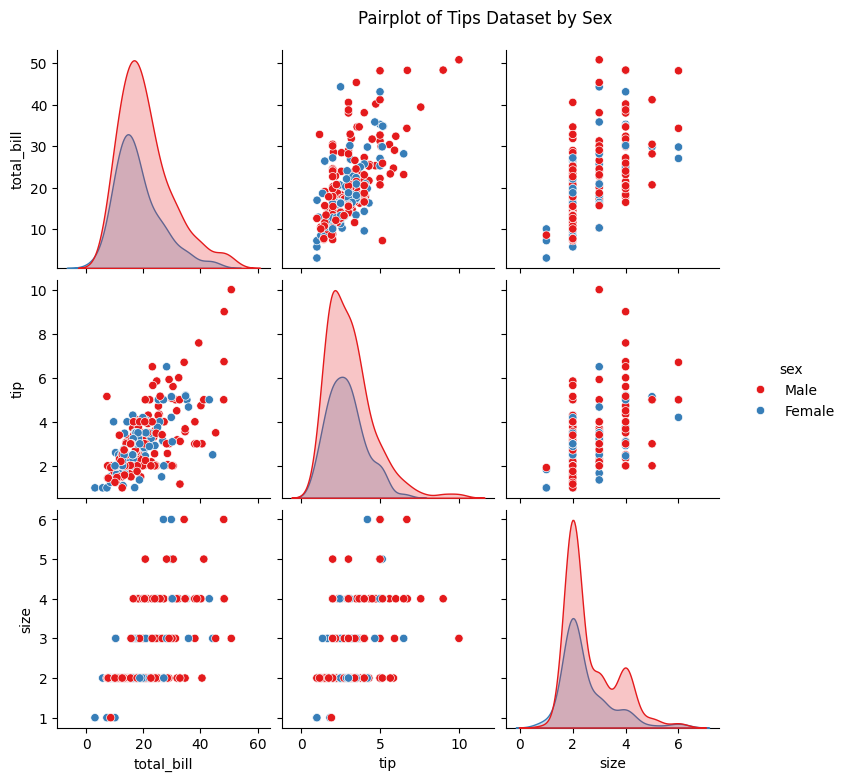

In [59]:
plt.figure(figsize=(10, 6))
sns.pairplot(data,hue='sex', palette='Set1')
plt.title('Pairplot of Tips Dataset by Sex', pad=350,ha='right')
plt.show()

### Insights:

* Males (Red) Drive Higher Values: Male patrons tend to contribute to higher total_bill amounts, tip amounts, and party size more frequently than females.

* Positive Correlations Maintained: The strong positive correlations between total_bill, tip, and size hold true for both male and female groups.

* Similar Distribution Shapes: Both genders show similar right-skewed distributions for total_bill and tip, and similar peaks for size (around 2-3 people).